# Clasificación de flores Iris

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm,datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
X = iris.data[:,:2]
Y = iris.target

In [4]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [5]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
x_min, x_max = X[:,0].min()-1 , X[:,0].max() + 1
y_min, y_max = X[:,1].min()-1 , X[:,1].max() + 1
h = (x_max-x_min)/100

xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
x_plot = np.c_[xx.ravel(),yy.ravel()]

In [7]:
x_plot

array([[3.3  , 1.   ],
       [3.356, 1.   ],
       [3.412, 1.   ],
       ...,
       [8.732, 5.368],
       [8.788, 5.368],
       [8.844, 5.368]])

In [8]:
c = 1.0
svc  = svm.SVC(kernel="linear",C=c,decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de iris kernel Lineal')

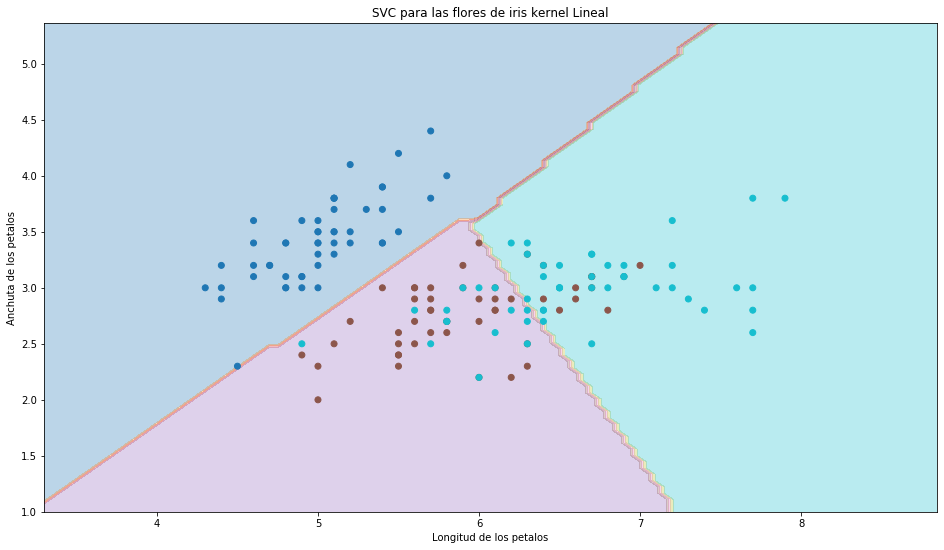

In [9]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred,cmap= plt.cm.tab10,alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchuta de los petalos")
plt.xlim(xx.min(),xx.max())
plt.title("SVC para las flores de iris kernel Lineal")

Text(0.5, 1.0, 'SVC para las flores de iris kernel RBF')

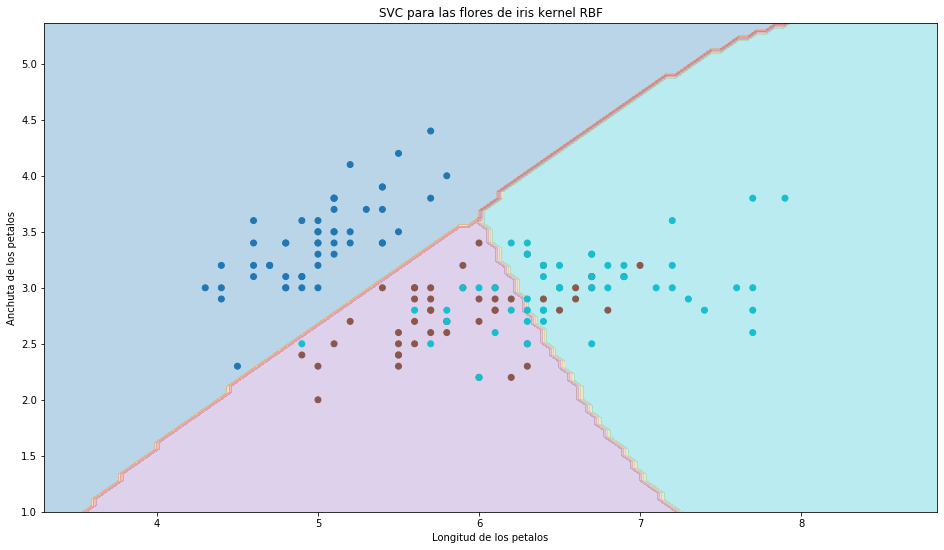

In [10]:
c = 1.0
svc  = svm.SVC(kernel="rbf",C=c,decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred,cmap= plt.cm.tab10,alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchuta de los petalos")
plt.xlim(xx.min(),xx.max())
plt.title("SVC para las flores de iris kernel RBF")

Text(0.5, 1.0, 'SVC para las flores de iris kernel RBF')

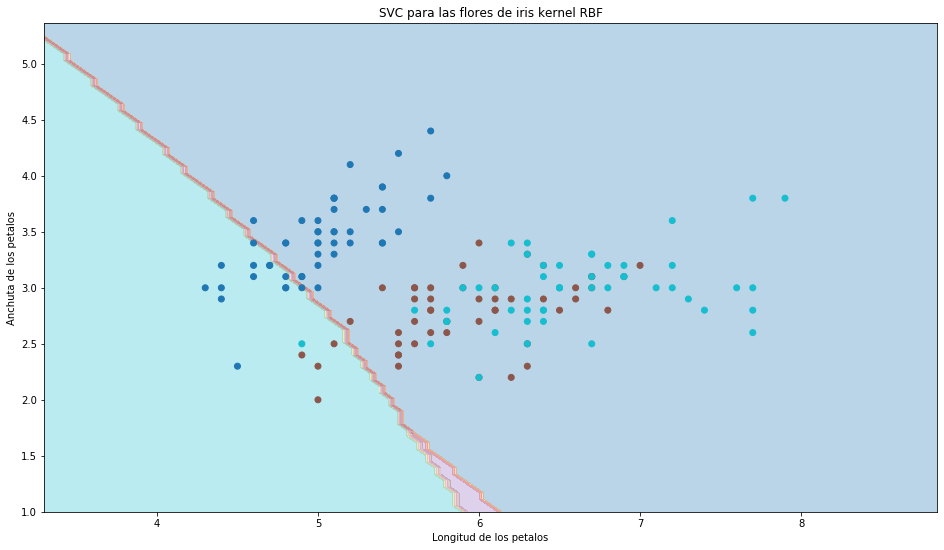

In [11]:
c = 1.0
svc  = svm.SVC(kernel="sigmoid",C=c,decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred,cmap= plt.cm.tab10,alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchuta de los petalos")
plt.xlim(xx.min(),xx.max())
plt.title("SVC para las flores de iris kernel RBF")

Text(0.5, 1.0, 'SVC para las flores de iris kernel RBF')

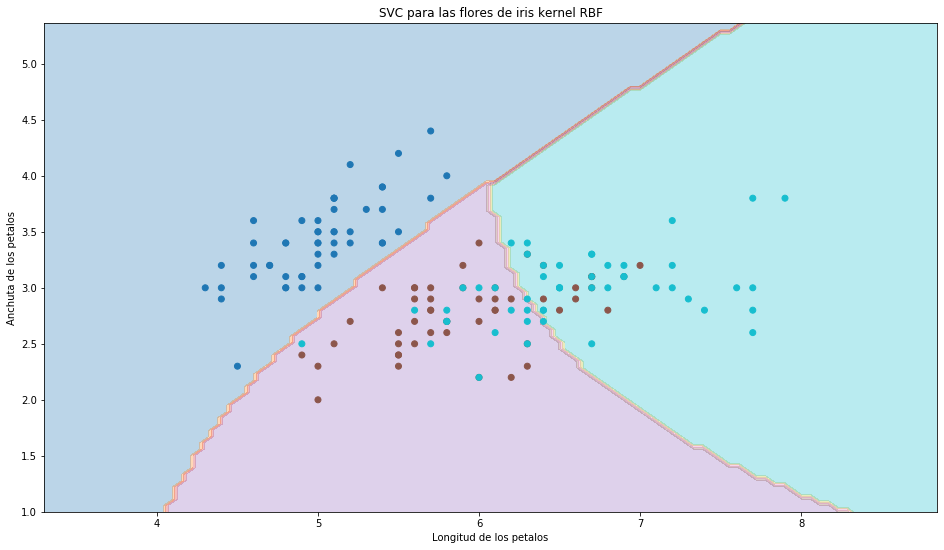

In [12]:
c = 1.0
svc  = svm.SVC(kernel="poly",C=c,decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred,cmap= plt.cm.tab10,alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchuta de los petalos")
plt.xlim(xx.min(),xx.max())
plt.title("SVC para las flores de iris kernel RBF")

In [17]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [18]:
X, Y = shuffle(X,Y)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [22]:
parameters = [
    {
        "kernel" : ['rbf'],
        "gamma" : [1e-4,1e-3,1e-2,0.1,0.2,0.5],
        "C" :[1,10,100,1000]
    },
    {
        "kernel":["linear"],
        "C": [1,10,100,1000]
    }
    
]

In [23]:
parameters

[{'kernel': ['rbf'],
  'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
  'C': [1, 10, 100, 1000]},
 {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [25]:
clf = GridSearchCV(svm.SVC(decision_function_shape = "ovr"),param_grid=parameters,cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [26]:
clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [30]:
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]
for m,s,p in zip(means,stds,params):
    print("%0.3f (+/-%0.3f) para %r"%(m,2*s,p))

0.753 (+/-0.090) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.753 (+/-0.090) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.767 (+/-0.094) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.813 (+/-0.137) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.813 (+/-0.137) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.807 (+/-0.115) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.753 (+/-0.090) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.760 (+/-0.107) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.137) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.800 (+/-0.112) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.787 (+/-0.108) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.793 (+/-0.065) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.760 (+/-0.107) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.137) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.800 (+/-0.094) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.787 (+/-0.108) para {'C': 100, 'gamma'

In [31]:
Y_pred = clf.predict(X_test)

In [35]:
print(classification_report(Y_test,Y_pred,target_names=["setosa","versicolor","virginics"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.81      0.76      0.79        17
   virginics       0.67      0.73      0.70        11

    accuracy                           0.82        38
   macro avg       0.83      0.83      0.83        38
weighted avg       0.82      0.82      0.82        38



# Resumen al final de la clasificación 

In [1]:

def svm_iris(C=1.0, gamma = 0.01, kernel = "rbf"):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt

    iris = datasets.load_iris()
    
    
    X = iris.data[:, :2]
    Y = iris.target

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    h = (x_max - x_min)/100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_plot = np.c_[xx.ravel(), yy.ravel()]

    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape="ovr").fit(X,Y)
    Ypred = svc.predict(X_plot)
    Ypred = Ypred.reshape(xx.shape)
    plt.figure(figsize=(16,9))
    plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
    plt.xlabel("Longitud de los pétalos")
    plt.ylabel("Anchura de los pétalos")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC para las flores de Iris con Kernel "+kernel)

In [3]:
from ipywidgets import interact, fixed

In [4]:
interact(svm_iris, C=[0.01, 0.1, 1,10,100,1000, 1e6, 1e10],
        gamma=[1e-5,1e-4,1e-3,1e-2, 0.1, 0.2, 0.5,0.99],
        kernel=["rbf","linear","sigmoid","poly"])

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0, 1000…

<function __main__.svm_iris(C=1.0, gamma=0.01, kernel='rbf')>